## **Problem statement**:-

The primary goal of this project is to predict fraudulent credit card transactions with the help of machine learning models.
In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.


## **Understanding and defining fraud**

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

* Manipulation/alteration of genuine cards
* Creation of counterfeit cards
* Stealing/loss of credit cards
* Fraudulent telemarketing

## **Project Pipeline**

The project pipeline can be briefly summarised in the following four steps:

* ***Data Understanding***: Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.
* ***Exploratory data analytics (EDA)***: Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
* ***Train/Test split***: Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
* ***Model building / hyperparameter tuning***: This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.
* ***Model evaluation***: Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Standardization method
from sklearn.preprocessing import StandardScaler, PowerTransformer
#Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
#Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Importing libraries for cross validation
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report

#Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing XGBoost
from xgboost import XGBClassifier

#Importing oversampler library
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)

## **Reading and understanding the data**

In [4]:
# Reading the dataset
credit_card_df = pd.read_csv("creditcard.csv")
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#check the shape of data frame
credit_card_df.shape

(284807, 31)

In [6]:
#check the data type and any column having null values or not
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

***Insights: The data set does not contain any null values***

In [7]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **Exploratory data analysis(EDA)**

## Handling missing values

#### Handling missing values in columns

In [8]:
credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

***Insights: there is no missing values in the dataset. Hence, there is no need of null value treatment.***

### Checking the distribution of the classes

In [9]:
classes = credit_card_df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

***Insights:***

Distribution of data not proper. 
* 284315 normal transaction cases.
* 492 fradulant cases

In [10]:
credit_card_df['Class'].value_counts(normalize=True) *100

0    99.827251
1     0.172749
Name: Class, dtype: float64

***Insights:***

Distribution of data is not proper. Dataset is highly imbalance.
* 99.83% normal transaction cases.
* 0.17% fradulant tarnsaction cases

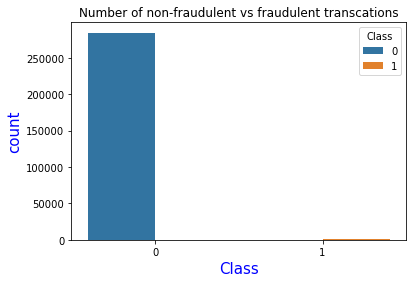

In [11]:
# Bar plot for the number of  non-fraudulent vs fraudulent  transcations
sns.countplot(x='Class', data=credit_card_df, hue='Class')
plt.title('Number of non-fraudulent vs fraudulent transcations')
plt.xlabel('Class', fontsize=15, color='blue')
plt.ylabel('count', fontsize=15, color='blue')
plt.show()

In [12]:
len(credit_card_df[credit_card_df['Class']==0])/len(credit_card_df)

0.9982725143693799

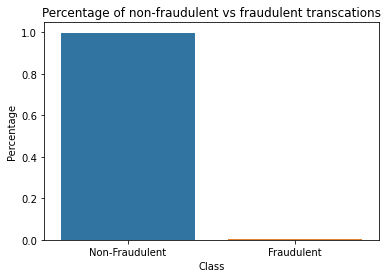

In [13]:
# Bar plot for the percentage distribution
percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[len(credit_card_df[credit_card_df['Class']==0])/len(credit_card_df), len(credit_card_df[credit_card_df['Class']==1])/len(credit_card_df)]} 
df_percentage = pd.DataFrame(percentage) 
sns.barplot(x='Class',y='Percentage', data=df_percentage)
plt.title('Percentage of non-fraudulent vs fraudulent transcations')
plt.show()

In [14]:
# Create a scatter plot to observe the distribution of classes with time
fraud_data = credit_card_df[credit_card_df['Class'] == 1]
# Creating non-fraud data
non_fraud_data = credit_card_df[credit_card_df['Class'] == 0]

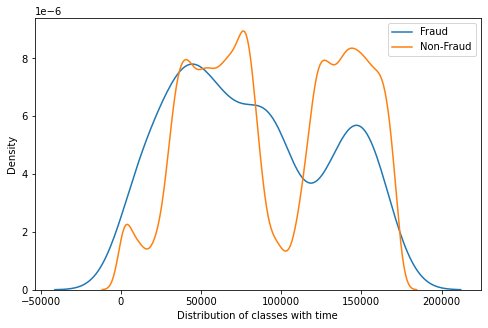

In [15]:
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_data['Time'],label='Fraud',hist=False)
ax = sns.distplot(non_fraud_data['Time'],label='Non-Fraud',hist=False)
ax.set(xlabel='Distribution of classes with time')
plt.legend()
plt.show()

***Insights: There is no specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.Hence, we can drop the `Time` column.***

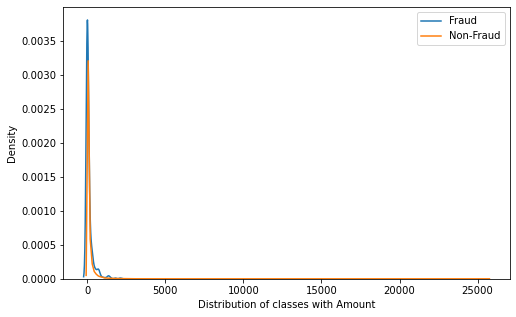

In [16]:
# Create a distribution plot to observe the distribution of classes with Amount
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_data['Amount'],label='Fraud',hist=False)
ax = sns.distplot(non_fraud_data['Amount'],label='Non-Fraud',hist=False)
ax.set(xlabel='Distribution of classes with Amount')
plt.legend()
plt.show()

***Insights:We can see that the fraudulent transctions are mostly happen in lower range of amount, on the other hand the non-fraudulent transactions happen all over the range***

In [17]:
#Dropping the Time column
credit_card_df.drop('Time', axis=1, inplace=True)

## **Splitting the data into train & test data**

In [18]:
X = credit_card_df.drop(['Class'], axis=1)

In [19]:
y = credit_card_df['Class']

In [20]:
#splitting by 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

## Feature Scaling

In [21]:
scaler = StandardScaler()

In [22]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76


**It seems like we need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.**

In [23]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [24]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


##### Scaling the test set
We only transform the test data with scaler instance

In [25]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


## Checking the Skewness

In [26]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

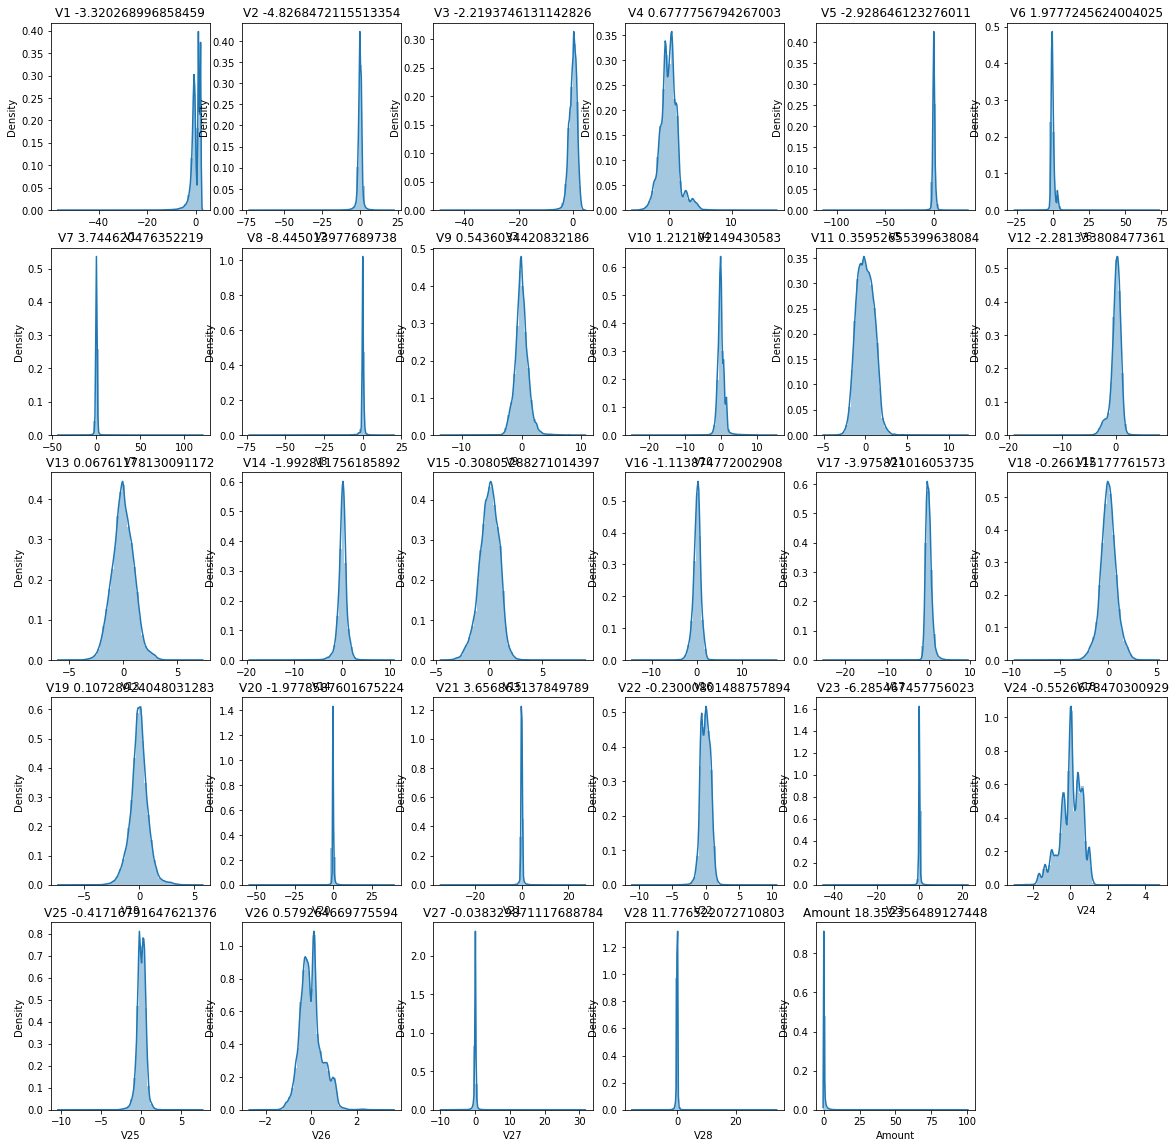

In [27]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(20,20))
for col in cols :    
    k=k+1
    plt.subplot(5, 6,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many skewed variables. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [28]:
#we are doing powertransform using yeo-johnson method
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[cols] = pt.fit_transform(X_train)

In [29]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

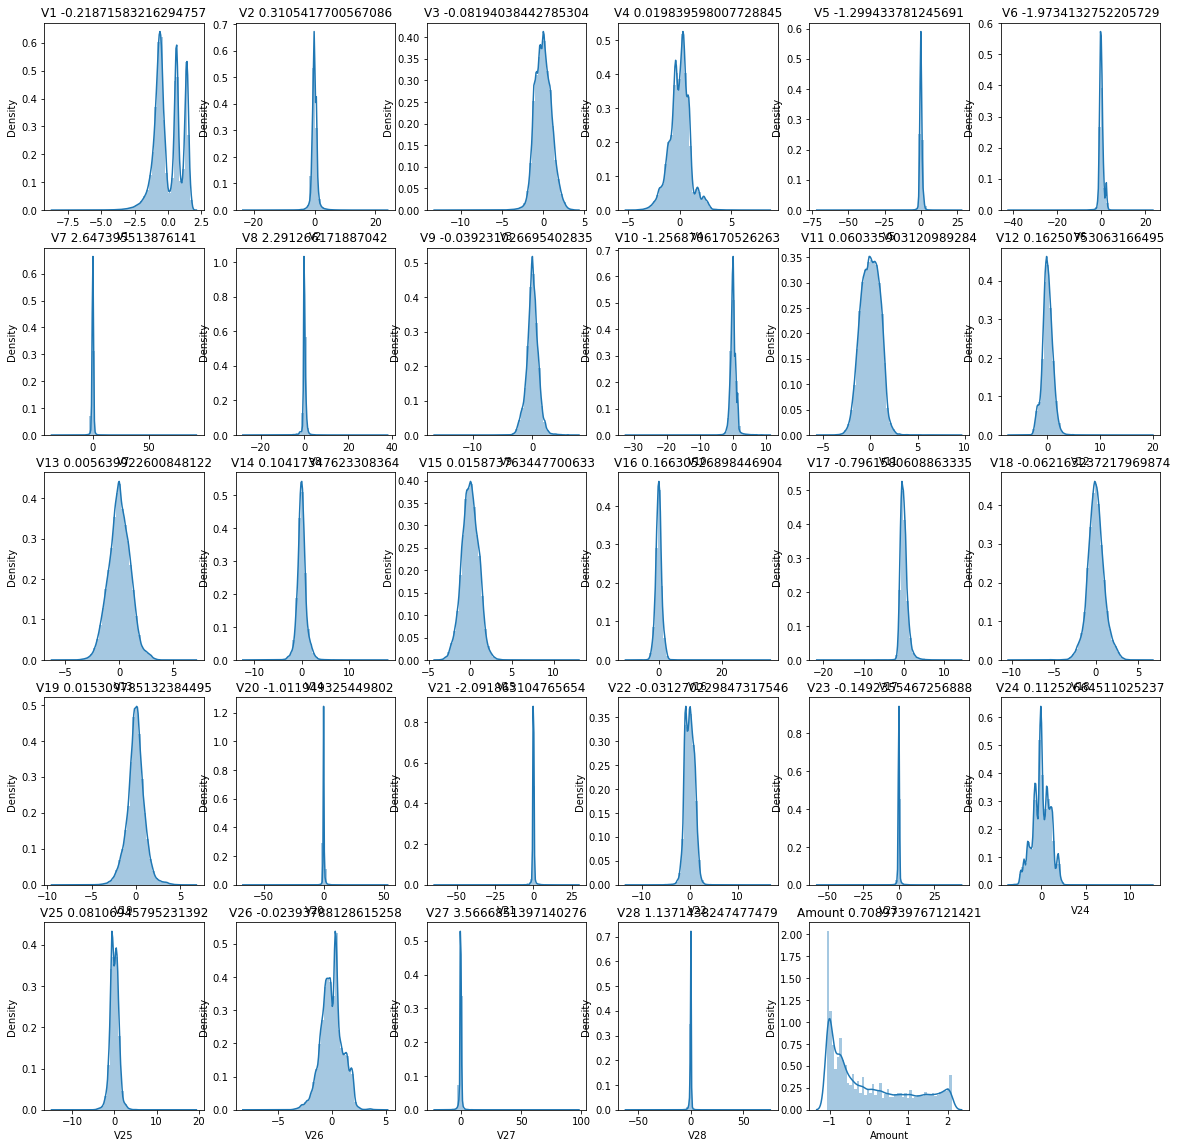

In [30]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(20,20))
for col in cols :    
    k=k+1
    plt.subplot(5, 6,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

***Now we can see that all the variables are normally distributed after the transformation.***

## **Model Building**
- Build different models on the imbalanced dataset and see the result

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Metric selection for heavily imbalanced data
As we have seen that the data is highly imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for  evaluation of the model. The default threshold of ROC_AUC is 0.5 thatis not  the ideal to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN was not used for model building?
KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

## A. Models on Imbalance Data

### 1. Logistic Regression on imbalanced data

#### 1.1. Tuning hyperparameter

In [31]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [32]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.424985,0.035559,0.021851,0.010852,0.01,{'C': 0.01},0.966167,0.989007,0.991357,0.970828,0.981780,0.979828,0.009886,1,0.986599,0.981099,0.980073,0.986226,0.980539,0.982907,0.002883
1,0.508771,0.020186,0.016295,0.000388,0.1,{'C': 0.1},0.968405,0.985414,0.989258,0.968293,0.981454,0.978565,0.008699,2,0.984972,0.979649,0.979029,0.985601,0.980301,0.981910,0.002793
2,0.568322,0.020174,0.016015,0.000589,1,{'C': 1},0.969239,0.984410,0.988167,0.967079,0.980800,0.977939,0.008346,3,0.984123,0.978959,0.978529,0.985220,0.979944,0.981355,0.002768
3,0.559916,0.025435,0.016052,0.000214,10,{'C': 10},0.969337,0.984301,0.988029,0.966932,0.980692,0.977858,0.008306,4,0.984012,0.978873,0.978468,0.985171,0.979897,0.981284,0.002765
4,0.556760,0.027664,0.016169,0.000146,100,{'C': 100},0.969351,0.984290,0.988014,0.966918,0.980684,0.977851,0.008301,5,0.984000,0.978864,0.978462,0.985165,0.979891,0.981277,0.002764


In [33]:
#function to plot train test validation score
def plot_train_test_val_score(cv_results):
    # plot of C versus train and validation scores
    plt.figure(figsize=(8, 8))
    plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
    plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
    plt.xlabel('C')
    plt.ylabel('roc_auc')
    plt.xscale('log')
    plt.legend(['test result', 'train result'], loc='upper right')
   

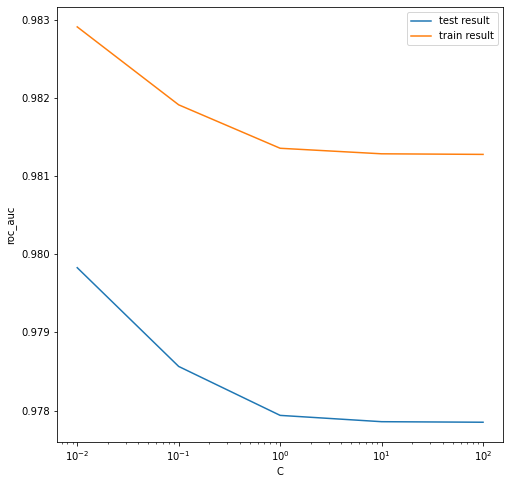

In [34]:
plot_train_test_val_score(cv_results)

In [35]:
# Best score with best parameter
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9798275665037472 at C = 0.01


#### 1.2. Logistic regression model with optimal parameter

In [36]:
#Instantiate the model with best parameter
logistic_imb = LogisticRegression(C=0.01)

In [37]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

#### 1.3. Prediction on the train set

In [38]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [39]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227424     27]
 [   154    240]]


In [40]:
def plot_confusion_matrix(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train, y_train_pred))
    

In [41]:
plot_confusion_matrix(confusion)

Accuracy:- 0.9992056002984485
Sensitivity:- 0.6091370558375635
Specificity:- 0.9998812931136817
F1-Score:- 0.7261724659606656


In [42]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.61      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845



##### 1.4. ROC on the train set

In [43]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [44]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

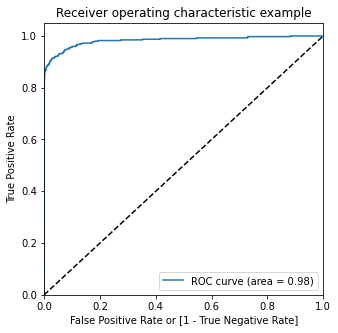

In [45]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

***Insights: with best hyperparameter C=0.01 we have achievded ROC area 0.98 on train data***

#### 1.5. Prediction on the test set

In [46]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [47]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855     9]
 [   41    57]]


In [48]:
plot_confusion_matrix(confusion)

Accuracy:- 0.9992056002984485
Sensitivity:- 0.5816326530612245
Specificity:- 0.9998417276308385
F1-Score:- 0.7261724659606656


In [49]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



##### 1.6. ROC on the test set

In [50]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

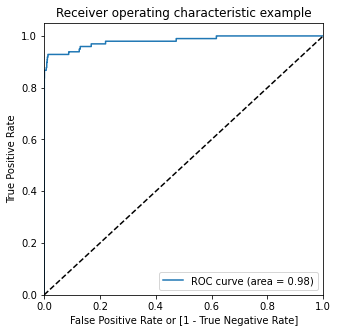

In [51]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Insights: with best hyper parameter C=0.01 we have achievded ROC area 0.98 on test data***

#### Logistic Regression Model summay with imbalanced data

***Model summary***

* ***Train set***
    * Accuracy:- 0.9992056002984485
    * Sensitivity:- 0.6091370558375635
    * Specificity:- 0.9998812931136817
    * F1-Score:- 0.7261724659606656
    * ROC Score:- 0.98

* ***Test set***
    * Accuracy:- 0.9992056002984485
    * Sensitivity:- 0.5816326530612245
    * Specificity:- 0.9998417276308385
    * F1-Score:- 0.7261724659606656
    * ROC Score:- 0.98

***Insights: We can see Logistic regression perform well on imbalance dataset and achievded 0.98 ROC score***

### 2. Decision Tree on imbalanced data

##### 2.1 Decission Tree for hyper parameter tune

In [52]:
# Create the parameter grid 
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [50, 100, 150],
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [53]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.539983,0.020287,0.022712,0.000372,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.919716,0.951700,0.928013,0.016998,18
1,3.518241,0.036528,0.022151,0.000103,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.927341,0.951697,0.930554,0.016112,16
2,3.519804,0.008485,0.021601,0.000465,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912541,0.927173,0.951646,0.930453,0.016132,17
3,3.506454,0.016533,0.021560,0.000144,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,13
4,3.506193,0.013097,0.021642,0.000220,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,13
5,3.507783,0.005002,0.021749,0.000117,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,13
6,3.502357,0.008171,0.022729,0.000517,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.924534,0.958883,0.933450,0.938956,0.014553,8
7,3.571619,0.087940,0.026282,0.005335,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.924534,0.958883,0.941036,0.941484,0.014027,3
8,3.508914,0.021155,0.022714,0.000336,5,150,150,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.924534,0.958883,0.941061,0.941493,0.014026,2
9,6.876625,0.055292,0.024123,0.000236,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934923,0.923813,0.915738,0.924825,0.007865,21


In [54]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9451490814218558
DecisionTreeClassifier(max_depth=15, min_samples_leaf=150,
                       min_samples_split=150)


**Best ROC score for DT is 0.94**

###### 2.2 Decission Tree Classifier model with optimal parameter

In [56]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=15, 
                                  min_samples_leaf=150,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=150,
                       min_samples_split=100, random_state=42)

##### 2.3. Prediction on the train set

In [70]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [71]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [72]:
plot_confusion_matrix(confusion)

Accuracy:- 0.999100265531392
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7233468286099864


In [73]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [74]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [75]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9983733875899014

##### 2.4 ROC for Train data

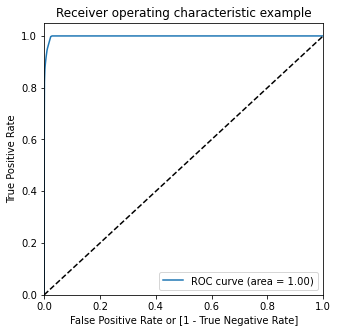

In [76]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### 2.5. Prediction on the test set

In [77]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [78]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56839    25]
 [   29    69]]


In [79]:
plot_confusion_matrix(confusion)

Accuracy:- 0.999100265531392
Sensitivity:- 0.7040816326530612
Specificity:- 0.9995603545301069
F1-Score:- 0.7233468286099864


In [80]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [81]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [82]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9468238934572141

##### 2.6. ROC for Test data DT imbalance

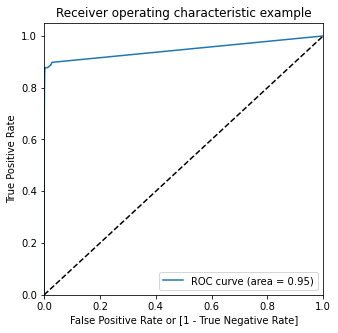

In [83]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Decission Tree Classifier on Imablance data***

* ***Train set***
    * Accuracy:- 0.999100265531392
    * Sensitivity:- 1.0
    * Specificity:- 1.0
    * F1-Score:- 0.7233468286099864
    * ROC Score:- 1.0
* ***Test set***
    * Accuracy:- 0.999100265531392
    * Sensitivity:- 0.7040816326530612
    * Specificity:- 0.9995603545301069
    * F1-Score:- 0.7233468286099864
    * ROC Score:- 0.95

***Insights: We can see Decission Tree on imbalance dataset has achievded 0.95 ROC score. Logistic Regression model perform better than Decission Tree***

### 3. Random forest on imbalance data

##### 3.1. Hyper parameter tune

In [84]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100], 
    'max_features': [10, 20]
}
# Create base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100]},
             return_train_score=True, verbose=1)

In [86]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9991660997222604 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


###### 3.2 RandomForest Classifier model with optimal parameter

In [87]:
# model with the best hyperparameters
rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             max_features=10,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             n_estimators=100)

In [88]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

##### 3.3 prediction on the train set for RF imbalance data

In [89]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [91]:
plot_confusion_matrix(confusion)

Accuracy:- 0.9993109350655051
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7846364883401921


In [92]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.73      0.78       394

    accuracy                           1.00    227845
   macro avg       0.93      0.86      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [93]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [94]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9752824767501103

##### 3.4 ROC of train data for RF Imabalaced data

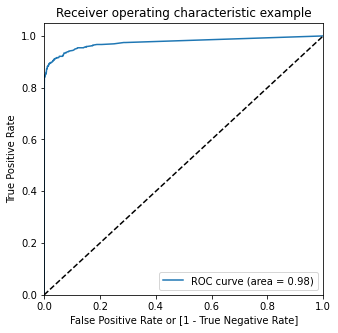

In [95]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### 3.5 Prediction on the test set

In [96]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [97]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56852    12]
 [   29    69]]


In [98]:
plot_confusion_matrix(confusion)

Accuracy:- 0.9993109350655051
Sensitivity:- 0.7040816326530612
Specificity:- 0.9997889701744513
F1-Score:- 0.7846364883401921


In [99]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.70      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [100]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [101]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9620002756307926

##### 3.6 ROC of test data for RF Imabalced data

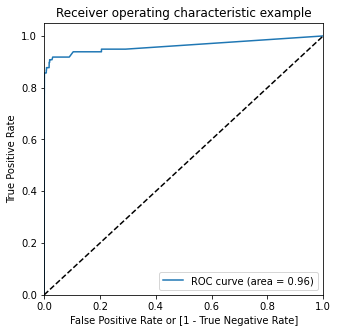

In [102]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Random Forest Classifier on Imablance data***

* ***Train set***
    * Accuracy:- 0.9993109350655051
    * Sensitivity:- 1.0
    * Specificity:- 1.0
    * F1-Score:- 0.7846364883401921
    * ROC Score:- 0.98

* ***Test set***
    * Accuracy:- 0.9993109350655051
    * Sensitivity:- 0.7040816326530612
    * Specificity:- 0.9997889701744513
    * F1-Score:- 0.7846364883401921
    * ROC Score:- 0.96

***Insights: We can see Random Forest on imbalance dataset has achievded 0.96 ROC score. Logistic Regression model still performing better than this.***

### 4. XGBoost on imbalance data

In [ ]:
!pip install --upgrade xgboost

##### 4.1 Tuning the hyperparameters

In [103]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...ot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [104]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,34.149469,1.178161,0.143925,0.003082,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.972622,0.973492,0.977180,0.974431,0.001976,2,0.999683,0.999816,0.999653,0.999717,0.000071
1,47.779701,0.300764,0.142794,0.002627,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978473,0.973756,0.985640,0.979289,0.004886,1,0.999955,0.999963,0.999896,0.999938,0.000030
2,32.063783,0.348022,0.146096,0.000848,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.966036,0.961730,0.984679,0.970815,0.009960,4,0.999980,0.999998,0.999862,0.999946,0.000060
3,46.298336,0.618935,0.146426,0.003464,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.967480,0.967638,0.982626,0.972582,0.007103,3,1.000000,1.000000,1.000000,1.000000,0.000000


##### 4.2 Model with optimal hyperparameters

In [105]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

**Best hyper parameter for XGBoost are learning_rate : 0.2 and subsample: 0.6**

In [107]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[11:23:50] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

##### 4.3 Prediction on the train set

In [108]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [109]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227451      0]
 [     0    394]]


In [110]:
plot_confusion_matrix(confusion)

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [111]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [112]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [113]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

##### 4.4 ROC for train data for XGBoost on imbalance data

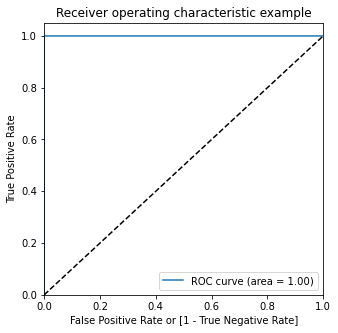

In [114]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

##### 4.5 Prediction on the test set

In [115]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [116]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56862     2]
 [   19    79]]


In [117]:
plot_confusion_matrix(confusion)

Accuracy:- 1.0
Sensitivity:- 0.8061224489795918
Specificity:- 0.9999648283624085
F1-Score:- 1.0


In [118]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [119]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [120]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9823391723036992

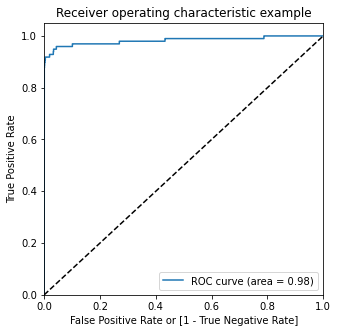

In [128]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Random Forest Classifier on Imablance data***

* ***Train set***
    * Accuracy:- 1.0
    * Sensitivity:- 1.0
    * Specificity:- 1.0
    * F1-Score:- 1.0
    * ROC Score:- 1.0

* ***Test set***
    * Accuracy:- 1.0
    * Sensitivity:- 0.8061224489795918
    * Specificity:- 0.9999648283624085
    * F1-Score:- 1.0
    * ROC Score:- 0.98

***Insights: We can see XGBoost Classifier on imbalance dataset has achievded 0.98 ROC score whch is same as Logistic Regression. But other metrics are performed well in case of XGboost.***


### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic,Decision Tree, Random Forest and  XGBoost), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as `XGBoost`, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Though XGBoost model costlier than Logistic Regression. But XGBoost got auc score as  0.9823391723036992.

#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


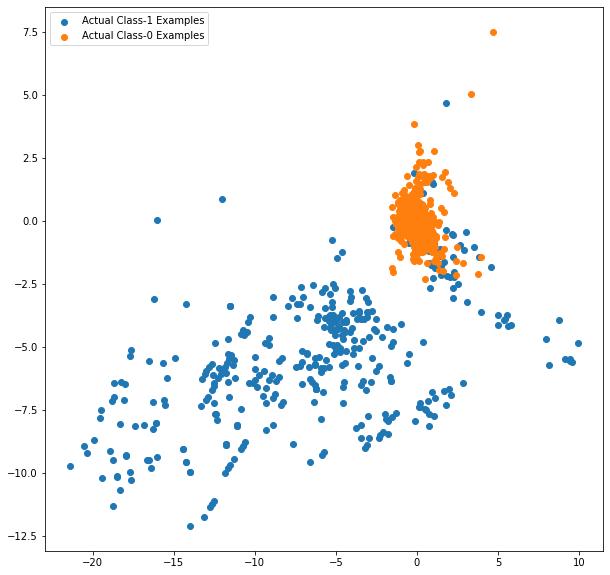

In [123]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [122]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.874395


**We can see that the threshold is 0.874, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.**

## B. Handling data imbalance
As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

- Undersampling :- the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions) to balance the class distribution.
- Oversampling :- Here we will increase the count of non-fraudulent transctions as fraudulent transctions to make it balance.
- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data. 
- Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

## 1.Undersampling

In [124]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [125]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 394, 1: 394})


## Model building on balanced data with Undersampling

### 1.1 Logistic Regression for undersampling

In [126]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [127]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007211,0.000718,0.003144,0.000099,0.01,{'C': 0.01},0.995984,0.976351,0.977597,0.976943,0.965596,0.978494,0.009799,3,0.980597,0.985968,0.985244,0.985510,0.986548,0.984773,0.002135
1,0.008488,0.000272,0.003144,0.000177,0.1,{'C': 0.1},0.994378,0.972329,0.979545,0.979743,0.973548,0.979909,0.007841,1,0.982421,0.988448,0.987342,0.986968,0.988055,0.986647,0.002176
2,0.011152,0.001063,0.003146,0.000125,1,{'C': 1},0.993896,0.968468,0.977273,0.982213,0.973548,0.979080,0.008669,2,0.984014,0.990081,0.988572,0.988125,0.988879,0.987934,0.002065
3,0.014347,0.002417,0.003056,0.000170,10,{'C': 10},0.994699,0.963964,0.979058,0.982872,0.963973,0.976913,0.011761,4,0.985132,0.991270,0.989208,0.989351,0.990115,0.989015,0.002075
4,0.016404,0.003271,0.003048,0.000142,100,{'C': 100},0.995181,0.957690,0.979383,0.982872,0.958617,0.974749,0.014534,5,0.985142,0.991431,0.989379,0.989361,0.990325,0.989128,0.002133


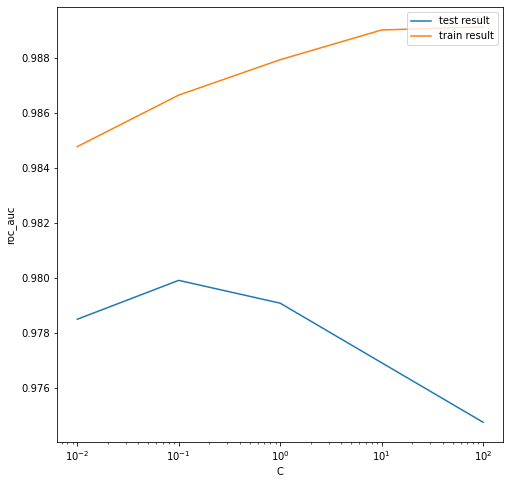

In [129]:
plot_train_test_val_score(cv_results)

In [130]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9799086138831914 at C = 0.1


#### 1.1.1 Logistic regression with optimal C

In [131]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [132]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

##### 1.1.2 Prediction on the train set

In [133]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [136]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[387   7]
 [ 36 358]]


In [138]:
def plot_confusion(confusion, train, pred):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(train, pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(train, pred))

In [139]:
plot_confusion(confusion, y_train_rus, y_train_pred)

Accuracy:- 0.9454314720812182
Sensitivity:- 0.9086294416243654
Specificity:- 0.9822335025380711
F1-Score:- 0.9433465085638998


In [140]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       394
           1       0.98      0.91      0.94       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788



In [141]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [142]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9860921435749439

##### 1.1.3 ROC for logistic regression on Train Undersampling data

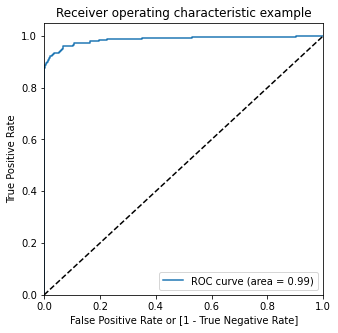

In [143]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### 1.1.4 Prediction on the test set

In [144]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [145]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55662  1202]
 [    7    91]]


In [146]:
plot_confusion(confusion, y_test, y_test_pred)

Accuracy:- 0.978775323900144
Sensitivity:- 0.9285714285714286
Specificity:- 0.9788618458075408
F1-Score:- 0.1308411214953271


In [147]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [148]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [149]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9838773931069332

##### 1.1.4 ROC for logistic regression on Test Undersampling data

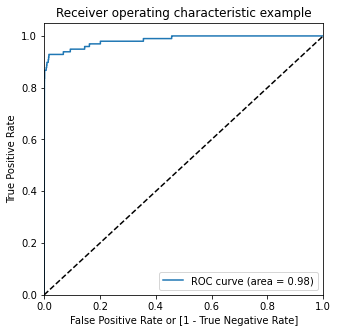

In [150]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Random Forest Classifier on Imablance data***

* ***Train set***
    * Accuracy:- 0.9454314720812182
    * Sensitivity:- 0.9086294416243654
    * Specificity:- 0.9822335025380711
    * F1-Score:- 0.9433465085638998
    * ROC Score:- 0.98

* ***Test set***
    * Accuracy:- 0.978775323900144
    * Sensitivity:- 0.9285714285714286
    * Specificity:- 0.9788618458075408
    * F1-Score:- 0.1308411214953271
    * ROC Score:- 0.98

***Insights: We can see Logistic Regression on undersampling balanced dataset has achievded 0.98(0.9838773931069332) ROC score***

### 1.2 XGBoost for undersampling

##### 1.2.1 Hyper parameter tuning for XGBoost for undersampling

In [151]:
# creating a KFold object 
folds = 3
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6]}          
#model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)       

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...ot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [152]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.125981,0.000344,0.007751,0.000263,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.971201,0.969986,0.982693,0.974627,0.005725,3,0.999361,0.99984,1.0,0.999734,0.000271
1,0.160582,0.003573,0.007334,0.000073,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972878,0.969928,0.982111,0.974972,0.005189,1,1.000000,1.00000,1.0,1.000000,0.000000
2,0.112072,0.001421,0.007459,0.000199,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.976290,0.963567,0.977857,0.972571,0.006399,4,0.999478,1.00000,1.0,0.999826,0.000246
3,0.128947,0.002066,0.007294,0.000054,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.972010,0.969581,0.982635,0.974742,0.005669,2,1.000000,1.00000,1.0,1.000000,0.000000


##### 1.2.2 XGBoost best hyper parameters 

In [153]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [154]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

[12:22:12] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

##### Prediction on the train set

In [155]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [156]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[394   0]
 [  0 394]]


In [157]:
plot_confusion(confusion, y_train_rus, y_train_rus)

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [158]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



In [159]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [160]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

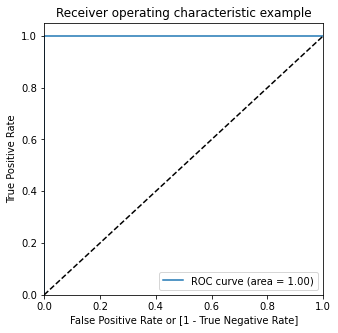

In [161]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [162]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [163]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54687  2177]
 [    6    92]]


In [165]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9616762051894245
Sensitivity:- 0.9387755102040817
Specificity:- 0.9617156724817107
F1-Score:- 0.0777355302070131


In [166]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.94      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [167]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [168]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.981482940320191

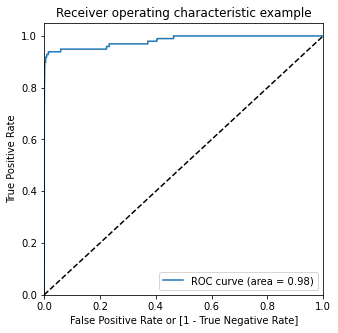

In [169]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Random Forest Classifier on undersampling balanced data***

* ***Train set***
    * Accuracy:- 1.0
    * Sensitivity:- 1.0
    * Specificity:- 1.0
    * F1-Score:- 1.0
    * ROC Score:- 1.0

* ***Test set***
    * Accuracy:- 0.9616762051894245
    * Sensitivity:- 0.9387755102040817
    * Specificity:- 0.9617156724817107
    * F1-Score:- 0.0777355302070131
    * ROC Score:- 0.98

***Insights: We can see XGboost on undersampling balanced dataset has achievded 0.98(0.981482940320191) ROC score***

### 1.3 Decision Tree for under sampling 

##### 1.3.1 Hyper tune parameters

In [170]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [171]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005559,0.000908,0.003256,0.000207,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.953529,0.960215,0.956872,0.003343,4
1,0.004813,0.000077,0.003135,0.000033,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.955358,0.962599,0.958979,0.003620,3
2,0.003917,0.000015,0.003023,0.000048,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933327,0.945013,0.939170,0.005843,5
3,0.003914,0.000139,0.002976,0.000003,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933327,0.945013,0.939170,0.005843,5
4,0.004870,0.000098,0.003167,0.000007,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.957652,0.963295,0.960473,0.002822,1
5,0.004688,0.000020,0.003137,0.000062,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.957652,0.963063,0.960357,0.002706,2
6,0.003966,0.000097,0.003104,0.000026,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933327,0.945013,0.939170,0.005843,5
7,0.003979,0.000076,0.003068,0.000019,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933327,0.945013,0.939170,0.005843,5


##### 1.3.2 best parameter for DT

In [172]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.960473086139813
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [173]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

##### 1.3.3 Prediction on the train set

In [174]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [175]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[385   9]
 [ 54 340]]


In [176]:
plot_confusion(confusion,y_train_rus, y_train_pred)

Accuracy:- 0.9200507614213198
Sensitivity:- 0.8629441624365483
Specificity:- 0.9771573604060914
F1-Score:- 0.9152086137281292


In [177]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       394
           1       0.97      0.86      0.92       394

    accuracy                           0.92       788
   macro avg       0.93      0.92      0.92       788
weighted avg       0.93      0.92      0.92       788



In [178]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [179]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9786872890308949

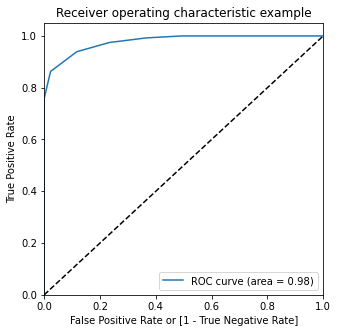

In [180]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### 1.3.4 Prediction on the test set

In [181]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [182]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55465  1399]
 [   15    83]]


In [183]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9751764334117482
Sensitivity:- 0.8469387755102041
Specificity:- 0.9753974395047833
F1-Score:- 0.10506329113924051


In [184]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [185]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [186]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9616202066082483

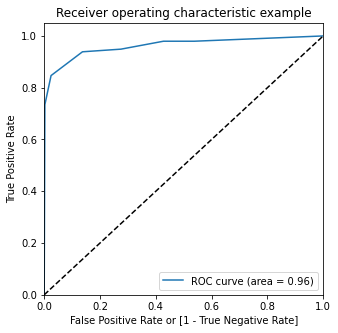

In [187]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Decission Tree Classifier on undersampling balanced data***

* ***Train set***
    * Accuracy:- 0.9200507614213198
    * Sensitivity:- 0.8629441624365483
    * Specificity:- 0.9771573604060914
    * F1-Score:-0.9152086137281292
    * ROC Score:- 0.98

* ***Test set***
    * Accuracy:- 0.9751764334117482
    * Sensitivity:- 0.8469387755102041
    * Specificity:- 0.9753974395047833
    * F1-Score:- 0.10506329113924051
    * ROC Score:- 0.96

***Insights: We can see DT on undersampling balanced dataset has achievded 0.96(0.9616202066082483) ROC score***

### 1.4 Random forest on undersampling balanced data

##### 1.4.1 Hyper parameter tuning

In [188]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

##### 1.4.2 Best hyper parameter

In [189]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9791414362647839 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [190]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=100)

In [191]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100)

##### 1.4.3 Prediction on the train set

In [192]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [193]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[384  10]
 [ 50 344]]


In [194]:
plot_confusion(confusion,y_train_rus, y_train_pred)

Accuracy:- 0.9238578680203046
Sensitivity:- 0.8730964467005076
Specificity:- 0.9746192893401016
F1-Score:- 0.9197860962566845


In [195]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       394
           1       0.97      0.87      0.92       394

    accuracy                           0.92       788
   macro avg       0.93      0.92      0.92       788
weighted avg       0.93      0.92      0.92       788



In [196]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [197]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9829227756448247

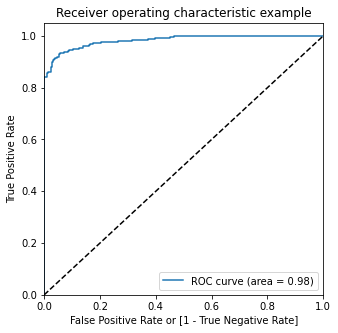

In [198]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### 1.4.4 Prediction on the test set

In [199]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [200]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55451  1413]
 [   11    87]]


In [201]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9750008777781679
Sensitivity:- 0.8877551020408163
Specificity:- 0.9751512380416432
F1-Score:- 0.10888610763454318


In [202]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [203]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [204]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9677162050807943

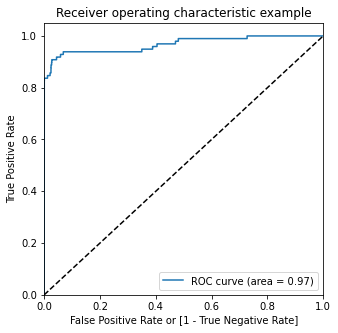

In [205]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary ofRandom Forest Classifier on undersampling balanced data***

* ***Train set***
    * Accuracy:- 0.9238578680203046
    * Sensitivity:- 0.8730964467005076
    * Specificity:-  0.9746192893401016
    * F1-Score:-0.9197860962566845
    * ROC Score:- 0.98

* ***Test set***
    * Accuracy:- 0.9750008777781679
    * Sensitivity:- 0.8877551020408163
    * Specificity:- 0.9751512380416432
    * F1-Score:- 0.10888610763454318
    * ROC Score:- 0.97

***Insights: We can see RF on undersampling balanced dataset has achievded 0.97(0.9677162050807943) ROC score***

## 2. Oversampling

In [206]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [207]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 2.1 Logistic Regression for oversampled balanced data

##### 2.1.1 Hyper tuning

In [208]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [209]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.164286,0.038719,0.027821,0.000509,0.01,{'C': 0.01},0.986944,0.986784,0.986336,0.986778,0.986997,0.986768,0.000233,5,0.986696,0.986778,0.986836,0.986819,0.986791,0.986784,0.000048
1,1.197705,0.019974,0.027366,0.000477,0.1,{'C': 0.1},0.987082,0.986925,0.986477,0.986920,0.987126,0.986906,0.000230,4,0.986830,0.986914,0.986976,0.986954,0.986936,0.986922,0.000051
2,1.181735,0.048374,0.027462,0.000545,1,{'C': 1},0.987096,0.986942,0.986494,0.986935,0.987143,0.986922,0.000229,3,0.986844,0.986928,0.986993,0.986970,0.986953,0.986938,0.000051
3,1.175757,0.052830,0.027609,0.000364,10,{'C': 10},0.987098,0.986945,0.986495,0.986937,0.987145,0.986924,0.000230,2,0.986846,0.986930,0.986995,0.986972,0.986954,0.986939,0.000051
4,1.165484,0.054757,0.027301,0.000363,100,{'C': 100},0.987098,0.986945,0.986495,0.986938,0.987145,0.986924,0.000229,1,0.986846,0.986930,0.986995,0.986972,0.986955,0.986939,0.000051


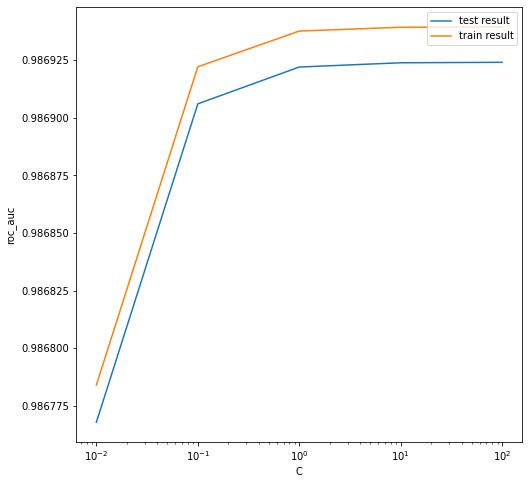

In [210]:
plot_train_test_val_score(cv_results)


##### 2.1.2 Best hyper parameter

In [211]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9869241048548304 at C = 100


#### 2.1.3 Logistic regression with optimal C

In [212]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [213]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

##### 2.1.4 Prediction on the train set

In [214]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[221442   6009]
 [ 19042 208409]]


In [216]:
plot_confusion(confusion,y_train_ros, y_train_pred)

Accuracy:- 0.9449309961266382
Sensitivity:- 0.916280869286132
Specificity:- 0.9735811229671446
F1-Score:- 0.9433067266542798


In [217]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



In [218]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [219]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9869181798571064

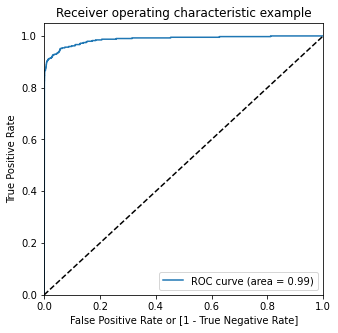

In [220]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### 2.1.5 Prediction on the test set

In [221]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [222]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55353  1511]
 [    8    90]]


In [223]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9733330992591552
Sensitivity:- 0.9183673469387755
Specificity:- 0.9734278277996623
F1-Score:- 0.10594467333725721


In [224]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [225]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [226]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9801722584785181

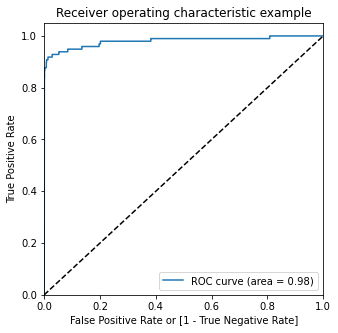

In [227]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Logistic Regression Classifier on oversampled balanced data***

* ***Train set***
    * Accuracy:- 0.9449309961266382
    * Sensitivity:- 0.916280869286132
    * Specificity:-  0.9735811229671446
    * F1-Score:- 0.9433067266542798
    * ROC Score:- 0.99

* ***Test set***
    * Accuracy:- 0.9733330992591552
    * Sensitivity:- 0.9183673469387755
    * Specificity:- 0. 0.9734278277996623
    * F1-Score:- 0.10594467333725721
    * ROC Score:- 0.98

***Insights: We can see Logistic Regression Classifier on oversampled balanced dataset has achievded 0.98(0.9801722584785181) ROC score***

### 2.2 XGBoost for oversampled balanced data

##### 2.2.1 Hyper parameter

In [228]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)       

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...ot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [229]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,56.564369,0.197700,0.274466,0.003085,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999890,0.999894,0.999881,0.999888,0.000005,4,0.999902,0.999903,0.999899,0.999901,1.945262e-06
1,74.158600,0.526459,0.278706,0.000299,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999893,0.999904,0.999883,0.999893,0.000008,3,0.999899,0.999912,0.999902,0.999905,5.367806e-06
2,56.598635,0.242710,0.274607,0.004560,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999980,0.999977,0.999982,0.999980,0.000002,2,0.999999,0.999990,0.999994,0.999994,3.782683e-06
3,73.046252,0.541702,0.316286,0.055854,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999983,0.999986,0.999985,0.999984,0.000001,1,0.999998,0.999997,0.999997,0.999997,8.001941e-07


##### 2.2.2 best hyper parameter for XGBoost

In [230]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [231]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[13:34:54] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

##### 2.2.3 Prediction on the train set

In [232]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [233]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227451      0]
 [     0 227451]]


In [234]:
plot_confusion(confusion,y_train_ros, y_train_ros)

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [235]:
print(classification_report(y_train_ros, y_train_ros))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [236]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [237]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

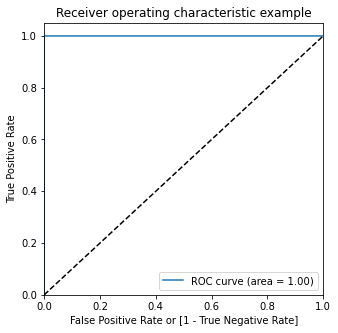

In [238]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### 2.2.4 Prediction on the test set

In [239]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [240]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56861     3]
 [   17    81]]


In [241]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9996488887328394
Sensitivity:- 0.826530612244898
Specificity:- 0.9999472425436128
F1-Score:- 0.8901098901098902


In [242]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [243]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [244]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9742859439780414

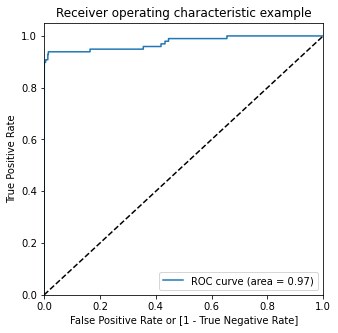

In [245]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of XGBoost Classifier on oversampled balanced data***

* ***Train set***
    * Accuracy:- 1.0
    * Sensitivity:- 1.0
    * Specificity:-  1.0
    * F1-Score:- 1.0
    * ROC Score:- 1.0

* ***Test set***
    * Accuracy:- 0.9996488887328394
    * Sensitivity:- 0.826530612244898
    * Specificity:- 0.9999472425436128
    * F1-Score:- 0.8901098901098902
    * ROC Score:- 0.97

***Insights: We can see Logistic Regression Classifier on oversampled balanced dataset has achievded 0.97(0.9742859439780414) ROC score***

### 2.3 Decision Tree on oversampled data

In [246]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [247]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.086209,0.019168,0.045513,0.000282,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986262,0.988011,0.987399,0.987224,0.000725,5
1,4.069994,0.007293,0.044434,0.000293,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986262,0.988011,0.987399,0.987224,0.000725,5
2,4.087861,0.009857,0.044720,0.000445,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986150,0.987963,0.987298,0.987137,0.000749,7
3,4.072807,0.005265,0.044050,0.000439,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986150,0.987950,0.987298,0.987133,0.000744,8
4,7.325431,0.009580,0.047190,0.000403,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999318,0.998466,0.998592,0.998792,0.000375,4
5,7.446211,0.159249,0.047137,0.001234,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999327,0.998464,0.998606,0.998799,0.000378,3
6,7.313444,0.025595,0.047992,0.000344,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999357,0.998483,0.998637,0.998826,0.000381,1
7,7.316912,0.016055,0.048545,0.000937,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999351,0.998421,0.998651,0.998808,0.000396,2


In [248]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9988256111546026
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [250]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [251]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [252]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[226023   1428]
 [  1187 226264]]


In [253]:
plot_confusion(confusion,y_train_ros, y_train_pred)

Accuracy:- 0.9942515091162493
Sensitivity:- 0.9947812935533368
Specificity:- 0.9937217246791616
F1-Score:- 0.9942545529646726


In [254]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



In [255]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [256]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.998746551708825

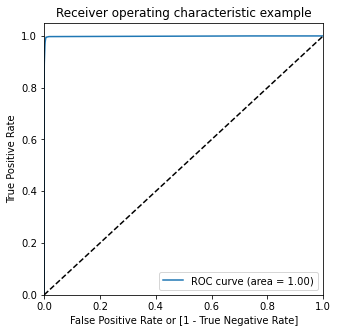

In [257]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [258]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [259]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56494   370]
 [   18    80]]


In [260]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9931884414170851
Sensitivity:- 0.8163265306122449
Specificity:- 0.9934932470455824
F1-Score:- 0.291970802919708


In [261]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.82      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962



In [262]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [263]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8687642122127409

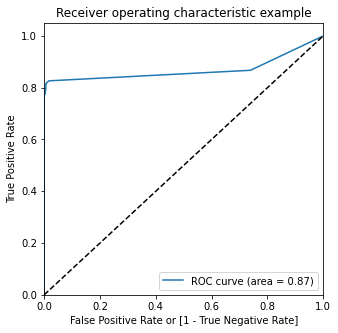

In [264]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Decission Tree Classifier on oversampled balanced data***

* ***Train set***
    * Accuracy:- 0.9942515091162493
    * Sensitivity:- 0.9947812935533368
    * Specificity:-  0.9937217246791616
    * F1-Score:- 0.9942545529646726
    * ROC Score:- 1.0

* ***Test set***
    * Accuracy:- 0.9996488887328394
    * Sensitivity:- 0.826530612244898
    * Specificity:- 0.9999472425436128
    * F1-Score:- 0.8901098901098902
    * ROC Score:- 0.87

***Insights: We can see Decission Tree Classifier on oversampled balanced dataset has achievded 0.87(0.8687642122127409) ROC score***

## 3. SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [265]:
# Instantiate SMOTE
sm = SMOTE(random_state=42)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [266]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454902, 29)


### 3.1 Logistic Regression on SMOTE data

##### 3.1.1 Hyper parameter tuning

In [267]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [268]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.246171,0.037998,0.029536,0.000808,0.01,{'C': 0.01},0.989287,0.989319,0.989493,0.989496,0.989402,0.989400,0.000086,5,0.989389,0.989451,0.989365,0.989438,0.989435,0.989416,0.000033
1,1.288805,0.020733,0.029013,0.000336,0.1,{'C': 0.1},0.989390,0.989439,0.989597,0.989608,0.989515,0.989510,0.000086,4,0.989497,0.989556,0.989477,0.989547,0.989552,0.989526,0.000033
2,1.289683,0.028021,0.029602,0.000347,1,{'C': 1},0.989400,0.989452,0.989607,0.989620,0.989527,0.989521,0.000086,3,0.989508,0.989567,0.989488,0.989558,0.989565,0.989537,0.000033
3,1.279711,0.025012,0.029634,0.000208,10,{'C': 10},0.989401,0.989453,0.989608,0.989621,0.989529,0.989522,0.000086,2,0.989510,0.989569,0.989489,0.989559,0.989566,0.989539,0.000033
4,1.282351,0.012906,0.029312,0.000195,100,{'C': 100},0.989401,0.989453,0.989609,0.989621,0.989529,0.989523,0.000086,1,0.989510,0.989569,0.989489,0.989560,0.989566,0.989539,0.000033


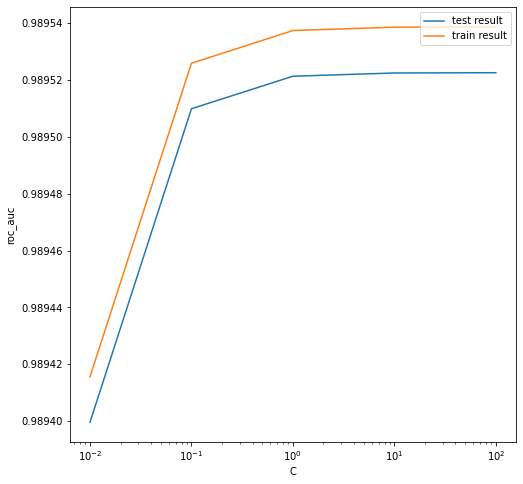

In [269]:
plot_train_test_val_score(cv_results)

In [270]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9895225622912077 at C = 100


#### 3.1.2 Logistic regression with optimal C

In [271]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [272]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### 3.1.3 Prediction on the train set

In [273]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [274]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221004   6447]
 [ 18860 208591]]


In [275]:
plot_confusion(confusion,y_train_smote, y_train_pred)

Accuracy:- 0.9443682375544623
Sensitivity:- 0.9170810416309447
Specificity:- 0.9716554334779799
F1-Score:- 0.9428076178164883


In [276]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



In [277]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [289]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.998746551708825

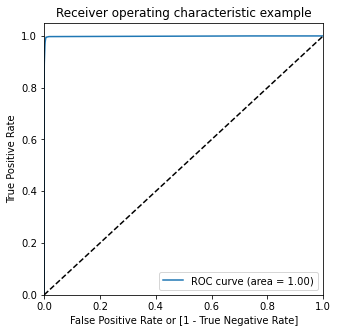

In [291]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### 3.1.4 Prediction on the test set

In [279]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [280]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55181  1683]
 [    7    91]]


In [281]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9703310979249324
Sensitivity:- 0.9285714285714286
Specificity:- 0.970403066966798
F1-Score:- 0.09722222222222221


In [282]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



##### 3.1.5 ROC on the test set

In [283]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

In [292]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9792312377258163

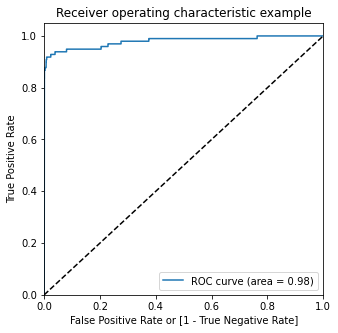

In [293]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Logistic Regression Classifier on SMOTE balanced data***

* ***Train set***
    * Accuracy:- 0.9443682375544623
    * Sensitivity:- 0.9170810416309447
    * Specificity:-  0.9716554334779799
    * F1-Score:- 0.9428076178164883
    * ROC Score:- 1.0

* ***Test set***
    * Accuracy:- 0.9703310979249324
    * Sensitivity:- 0.9285714285714286
    * Specificity:- 0.970403066966798
    * F1-Score:- 0.09722222222222221
    * ROC Score:- 0.98

***Insights: We can see Logistic Regression Classifier on SMOTE balanced dataset has achievded 0.98(0.9792312377258163) ROC score***

### 3.2 XGBoost on SMOTE data

##### 3.2.1 Hyper parameter tuning

In [294]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)       

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...ot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [295]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,69.173856,0.178060,0.296827,0.016654,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999559,0.999548,0.999548,0.999552,5.106391e-06,3,0.999636,0.999580,0.999583,0.999600,0.000025
1,99.927629,0.231464,0.282455,0.001083,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999514,0.999565,0.999534,0.999537,2.098984e-05,4,0.999576,0.999587,0.999563,0.999575,0.000010
2,68.055771,0.075500,0.279666,0.004269,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999928,0.999926,0.999927,0.999927,6.017183e-07,2,0.999965,0.999961,0.999966,0.999964,0.000002
3,98.604248,0.108425,0.282720,0.005222,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999940,0.999937,0.999922,0.999933,7.957493e-06,1,0.999963,0.999967,0.999968,0.999966,0.000002


In [296]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [297]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[14:51:50] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

##### 3.2.2 Prediction on the train set

In [298]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [299]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227447      4]
 [     0 227451]]


In [300]:
plot_confusion(confusion,y_train_smote, y_train_pred)

Accuracy:- 0.9999912068973098
Sensitivity:- 1.0
Specificity:- 0.9999824137946195
F1-Score:- 0.9999912069746277


In [301]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [371]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [372]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

In [302]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.998746551708825

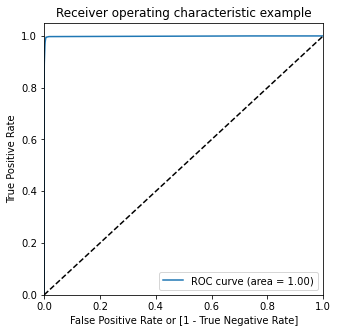

In [303]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### 3.2.3 Prediction on the test set

In [304]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [305]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56840    24]
 [   14    84]]


In [306]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.9993328885923949
Sensitivity:- 0.8571428571428571
Specificity:- 0.9995779403489027
F1-Score:- 0.8155339805825242


In [307]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.86      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [308]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [309]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9840286670380025

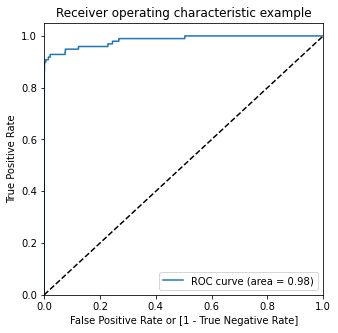

In [310]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of XGBoost Classifier on SMOTE balanced data***

* ***Train set***
    * Accuracy:- 0.9999912068973098
    * Sensitivity:- 1.0
    * Specificity:- 0.9999824137946195
    * F1-Score:- 0.9999912069746277
    * ROC Score:- 1.0


* ***Test set***
    * Accuracy:- 0.9993328885923949
    * Sensitivity:-  0.8571428571428571
    * Specificity:- 0.9995779403489027
    * F1-Score:- 0.8155339805825242
    * ROC Score:- 0.98

***Insights: We can see XGBoost Classifier on SMOTE balanced dataset has achievded 0.98(0.9840286670380025) ROC score***

### 3.3 Decision Tree for SMOTE

##### 3.3.1 Hyper parameter tuning

In [311]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [312]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.872914,0.011825,0.047191,0.001536,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986833,0.986141,0.986067,0.986347,0.000345,5
1,6.858528,0.017414,0.045605,0.000741,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986833,0.986139,0.986067,0.986347,0.000345,6
2,6.844227,0.009580,0.046043,0.000574,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986791,0.986120,0.986038,0.986316,0.000337,7
3,6.844840,0.010261,0.046258,0.000926,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986791,0.986118,0.986038,0.986316,0.000338,8
4,12.975362,0.150809,0.050041,0.000500,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997304,0.997473,0.996892,0.997223,0.000244,1
5,12.958926,0.058842,0.050005,0.001116,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997291,0.997461,0.996893,0.997215,0.000238,2
6,12.866914,0.044636,0.049141,0.000921,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997038,0.997271,0.996764,0.997024,0.000207,4
7,12.900744,0.022509,0.049018,0.000231,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997104,0.997282,0.996779,0.997055,0.000208,3


In [313]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9972230586501155
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [314]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

#####  3.3.2 Prediction on the train set

In [315]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [316]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223880   3571]
 [  2711 224740]]


In [317]:
plot_confusion(confusion,y_train_smote, y_train_pred)

Accuracy:- 0.9861904322249627
Sensitivity:- 0.9880809493033664
Specificity:- 0.984299915146559
F1-Score:- 0.9862164901856671


In [318]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227451
           1       0.98      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



In [319]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [320]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9980423837825705

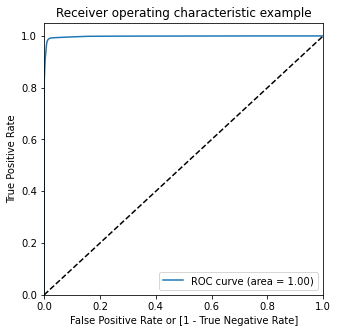

In [321]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### 3.3.3 Prediction on the test set

In [322]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [323]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55919   945]
 [   14    84]]


In [324]:
plot_confusion(confusion,y_test, y_test_pred)

Accuracy:- 0.983164214739651
Sensitivity:- 0.8571428571428571
Specificity:- 0.9833814012380416
F1-Score:- 0.14906832298136644


In [325]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.86      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [326]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [327]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9157755920319732

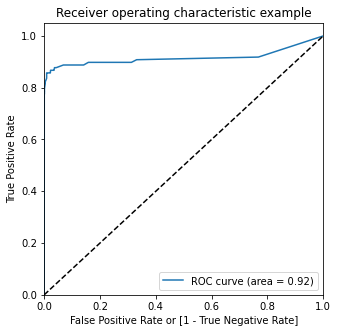

In [328]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary of Decission Tree Classifier on SMOTE balanced data***

* ***Train set***
    * Accuracy:- 0.9861904322249627
    * Sensitivity:- 0.9880809493033664
    * Specificity:-  0.984299915146559
    * F1-Score:-  0.9862164901856671
    * ROC Score:- 1.0

* ***Test set***
    * Accuracy:- 0.983164214739651
    * Sensitivity:- 0.8571428571428571
    * Specificity:-0.9833814012380416
    * F1-Score:- 0.14906832298136644
    * ROC Score:- 0.92

***Insights: We can see Decission Tree Classifier on SMOTE balanced dataset has achievded 0.92(0.9157755920319732) ROC score***


### Choosing best model on the balanced data

we have balanced the data with various approach such as Undersampling, Oversampling, and SMOTE . With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model. 

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE  models performed well. Among those models the XGBoost has ROC score 1.0 in the train set and 0.98 on the test set.We can choose XGboost as the best model. But Logistic Regression models also performed very well with almost same ROC score. Logistic Regression got 0.9792312377258163 where as XGBoost got 0.9840286670380025. So very minor margin between these two scores.

**Hence, we can consider two models `XGBoost Classifier model with SMOTE` according the computation and `Logistic Regression with SMOTE` for simplicity and performance.**

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [329]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.98952296310335
Threshold= 0.36998092067344757


We can see that the threshold is 0.36, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Summary

**Using different techniques we have evalueated many models where ROC score is more or less very close to each other. Here comes the tradeoff between computation power cost and prediction value cost. Some simple models like logictic Regression perform really well where RandomForest or XGBoost suppress logistic regression by some fraction, then we have check with business  people what should be the priority. Generally Random Forest or XGBoost required more coputation power so investment on hardware will be more. Where Logistic Regression does not need heavy computation power, hence it can works on low cost hardware also. On the other hand XGBoost/RF may have better result compare to logistic Regression by some fraction.**
